#Liberaries


In [1]:
# necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import pickle
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#preprossing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
#Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#evaluate model
from sklearn.metrics import (confusion_matrix,classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve,
                             log_loss, balanced_accuracy_score, matthews_corrcoef,
                             cohen_kappa_score, fbeta_score, hamming_loss,
                             jaccard_score, brier_score_loss)
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, make_scorer
from IPython.core.debugger import set_trace

import warnings
warnings.filterwarnings('ignore')

#Load Data

In [2]:
# load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/ASD/BalancedToddler/Autism_Dataset_Toddlers.csv',index_col=False)
data.head()

Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits  
0               No  
1              Yes  
2              Yes  
3              Yes  
4              Yes

#DataPreprossing

In [4]:
# Verify column names
print("Column names:", data.columns)
data.info()
data.shape

Column names: Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10

(1054, 19)

In [5]:
data = data.drop(['Case_No','Qchat-10-Score'], axis=1)

In [6]:
data = data.rename(columns={'Class/ASD Traits': 'ASD'})

In [7]:
# data['ASD']= data['ASD'].replace('YES','1')
# data['ASD']= data['ASD'].replace('NO','0')

data.loc[data['ASD'] == 'YES', 'ASD']=1
data.loc[data['ASD'] == 'NO', 'ASD']=0
le = LabelEncoder()

data['ASD'] = le.fit_transform(data['ASD'])
data['ASD']

0       0
1       1
2       1
3       1
4       1
       ..
1049    0
1050    1
1051    1
1052    0
1053    1
Name: ASD, Length: 1054, dtype: int64

In [8]:
print(data.columns)


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'ASD'],
      dtype='object')


In [9]:
data.duplicated().sum()

79

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()


0

In [12]:
data.shape

(975, 17)

In [13]:
data.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
ASD                       0
dtype: int64

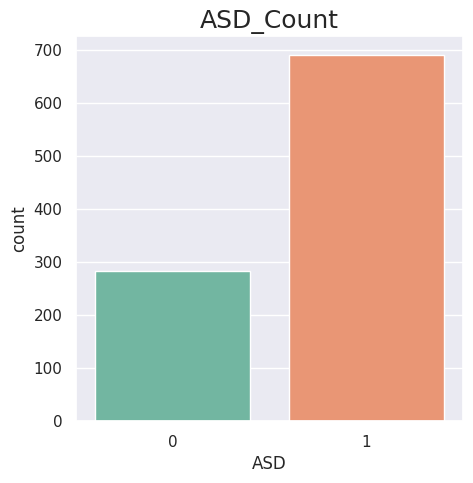

ASD
1    691
0    284
Name: count, dtype: int64

In [14]:
plt.figure(figsize=(5, 5))
sns.countplot(x='ASD', data=data,palette='Set2')
plt.title('ASD_Count', fontsize=18)
plt.savefig('/content/drive/MyDrive/ASD/BalancedToddler/Features_figs/ASD_count.png')
plt.show()
data['ASD'].value_counts()

In [15]:
#get numeric data properities
data.describe()

A1          A2          A3          A4          A5          A6  \
count  975.000000  975.000000  975.000000  975.000000  975.000000  975.000000   
mean     0.575385    0.457436    0.397949    0.517949    0.530256    0.583590   
std      0.494538    0.498441    0.489726    0.499934    0.499340    0.493216   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               A7          A8          A9         A10    Age_Mons         ASD  
count  975.000000  975.000000  975.000000  975.000000  975.000000  975.000000  
mean     0.667692    0.464615    0.497436    0.585641   27.899487    0.708718  
std      0.471282    0.499002    0.500250    0.492864    7.855350    0.454586  
min      0.000000    0.000000    0.000000    0.000000   12.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000   23.000000    0.000000  
50%      1.000000    0.000000    0.000000    1.000000   30.000000    1.000000  
75%      1.000000    1.000000    1.000000    1.000000   36.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000   36.000000    1.000000

In [16]:
#get categorical data properities
data.describe(include='O')

Sex       Ethnicity Jaundice Family_mem_with_ASD  \
count   975             975      975                 975   
unique    2              11        2                   2   
top       m  White European       no                  no   
freq    683             312      701                 819   

       Who completed the test  
count                     975  
unique                      5  
top             family member  
freq                      939

#Features(X)and target(Y)

In [17]:
# Split features and target
X = data.drop(columns=['ASD'])
y = data['ASD']


In [18]:
X.shape

(975, 16)

In [19]:
y.shape

(975,)

#DataEncoding

In [20]:
numerical_data=X.select_dtypes(include=[np.number]).columns
numerical_data

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons'],
      dtype='object')

In [21]:
categorical_data=X.select_dtypes(include=[object]).columns
categorical_data

Index(['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test'],
      dtype='object')

In [22]:
# Impute missing values in numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
data[numerical_data] = numeric_imputer.fit_transform(data[numerical_data])

# Impute missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_data] = categorical_imputer.fit_transform(data[categorical_data])

# Display the modified DataFrame with the original headers
print("\nDataFrame after imputing missing values:")
print(data.head())


DataFrame after imputing missing values:
    A1   A2   A3   A4   A5   A6   A7   A8   A9  A10  Age_Mons Sex  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0      28.0   f   
1  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0      36.0   m   
2  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0      36.0   m   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      24.0   m   
4  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      20.0   f   

        Ethnicity Jaundice Family_mem_with_ASD Who completed the test  ASD  
0  middle eastern      yes                  no          family member    0  
1  White European      yes                  no          family member    1  
2  middle eastern      yes                  no          family member    1  
3        Hispanic       no                  no          family member    1  
4  White European       no                 yes          family member    1  


In [23]:
data.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
ASD                       0
dtype: int64

In [24]:
# Print the name of each feature
print("Feature names:")
for i, feature in enumerate(X.columns, start=1):
    print(f'X{i-1} is {feature}')

Feature names:
X0 is A1
X1 is A2
X2 is A3
X3 is A4
X4 is A5
X5 is A6
X6 is A7
X7 is A8
X8 is A9
X9 is A10
X10 is Age_Mons
X11 is Sex
X12 is Ethnicity
X13 is Jaundice
X14 is Family_mem_with_ASD
X15 is Who completed the test


In [25]:
copy_X=X.copy()
copy_X

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons Sex       Ethnicity  \
0      0   0   0   0   0   0   1   1   0    1        28   f  middle eastern   
1      1   1   0   0   0   1   1   0   0    0        36   m  White European   
2      1   0   0   0   0   0   1   1   0    1        36   m  middle eastern   
3      1   1   1   1   1   1   1   1   1    1        24   m        Hispanic   
4      1   1   0   1   1   1   1   1   1    1        20   f  White European   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...  ..             ...   
1049   0   0   0   0   0   0   0   0   0    1        24   f  White European   
1050   0   0   1   1   1   0   1   0   1    0        12   m           black   
1051   1   0   1   1   1   1   1   1   1    1        18   m  middle eastern   
1052   1   0   0   0   0   0   0   1   0    1        19   m  White European   
1053   1   1   0   0   1   1   0   1   1    0        24   m           asian   

     Jaundice Family_mem_with_ASD Who completed the test  
0         yes                  no          family member  
1         yes                  no          family member  
2         yes                  no          family member  
3          no                  no          family member  
4          no                 yes          family member  
...       ...                 ...                    ...  
1049       no                 yes          family member  
1050      yes                  no          family member  
1051      yes                  no          family member  
1052       no                 yes          family member  
1053      yes                 yes          family member  

[975 rows x 16 columns]

In [26]:
#Data Encoder
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        self.encoders = {col: LabelEncoder().fit(X[col]) for col in self.columns}
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = self.encoders[col].transform(X_copy[col])
        return X_copy

# Apply the custom encoder
mcle = MultiColumnLabelEncoder(columns=['Sex', 'Ethnicity','Jaundice', 'Family_mem_with_ASD','Who completed the test'],
)

X_label_encoded = mcle.fit_transform(copy_X)
print(X_label_encoded)

      A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Ethnicity  \
0      0   0   0   0   0   0   1   1   0    1        28    0          8   
1      1   1   0   0   0   1   1   0   0    0        36    1          5   
2      1   0   0   0   0   0   1   1   0    1        36    1          8   
3      1   1   1   1   1   1   1   1   1    1        24    1          0   
4      1   1   0   1   1   1   1   1   1    1        20    0          5   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...  ...        ...   
1049   0   0   0   0   0   0   0   0   0    1        24    0          5   
1050   0   0   1   1   1   0   1   0   1    0        12    1          7   
1051   1   0   1   1   1   1   1   1   1    1        18    1          8   
1052   1   0   0   0   0   0   0   1   0    1        19    1          5   
1053   1   1   0   0   1   1   0   1   1    0        24    1          6   

      Jaundice  Family_mem_with_ASD  Who completed the test  
0            1                    0  

In [27]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label_encoded)
X_scaled

array([[-1.1640758 , -0.91820487, -0.81301173, ...,  1.5994981 ,
        -0.43643578,  0.18687755],
       [ 0.85905059,  1.08908156, -0.81301173, ...,  1.5994981 ,
        -0.43643578,  0.18687755],
       [ 0.85905059, -0.91820487, -0.81301173, ...,  1.5994981 ,
        -0.43643578,  0.18687755],
       ...,
       [ 0.85905059, -0.91820487,  1.22999455, ...,  1.5994981 ,
        -0.43643578,  0.18687755],
       [ 0.85905059, -0.91820487, -0.81301173, ..., -0.62519612,
         2.29128785,  0.18687755],
       [ 0.85905059,  1.08908156, -0.81301173, ...,  1.5994981 ,
         2.29128785,  0.18687755]])

#Feature Engineering

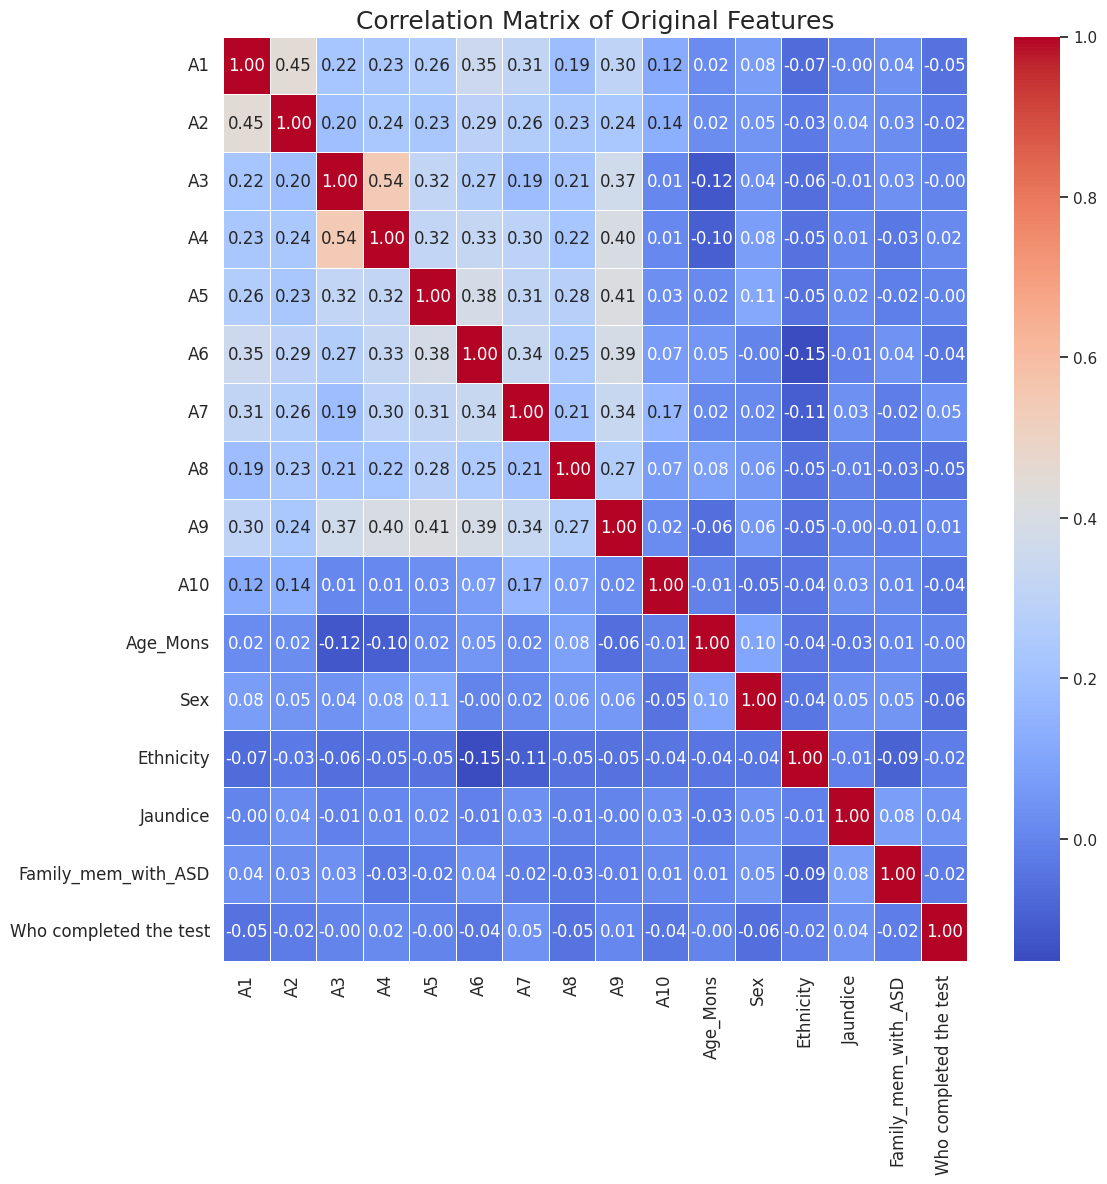

In [28]:
# Correlation matrix for original features (X_label_encoded)
plt.figure(figsize=(12, 12))
corr_matrix = X_label_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidth=.7)
plt.title('Correlation Matrix of Original Features', fontsize=18)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.savefig('/content/drive/MyDrive/ASD/BalancedToddler/Features_figs/original_features_correlation_matrix.png')
plt.show()

In [29]:
# Feature engineering (e.g., adding polynomial features)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
X_poly

array([[ 1.        , -1.1640758 , -0.91820487, ..., -0.6980782 ,
         0.29891028, -0.08156005],
       [ 1.        ,  0.85905059,  1.08908156, ..., -0.6980782 ,
         0.29891028, -0.08156005],
       [ 1.        ,  0.85905059, -0.91820487, ..., -0.6980782 ,
         0.29891028, -0.08156005],
       ...,
       [ 1.        ,  0.85905059, -0.91820487, ..., -0.6980782 ,
         0.29891028, -0.08156005],
       [ 1.        ,  0.85905059, -0.91820487, ..., -1.43250427,
        -0.11683512,  0.42819025],
       [ 1.        ,  0.85905059,  1.08908156, ...,  3.66491055,
         0.29891028,  0.42819025]])

In [30]:
# Plot Correlation after Polynomial Feature Expansion (X_poly)
X_poly_df = pd.DataFrame(X_poly)
plt.figure(figsize=(50, 45))
sns.heatmap(X_poly_df.corr(), annot=True, cmap='coolwarm',fmt='.1f',linewidth=.5)
plt.title('Correlation Matrix After Polynomial Feature Expansion',fontsize=20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/BalancedToddler/Features_figs/polynomial features_correlation_matrix.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [31]:
# Feature reduction based on correlation threshold
# Assuming X_poly_df is your DataFrame
threshold = 0.9  # Set your desired correlation threshold

# Calculate the correlation matrix
corr_matrix = X_poly_df.corr()
upper_triangle = np.triu(corr_matrix, k=1)  # Get upper triangle of correlation matrix

# Identify columns to drop based on threshold
high_corr_features = [i for i in range(len(X_poly_df.columns)) if any(np.abs(upper_triangle[:, i]) > threshold)]

# Drop the highly correlated columns
X_poly_reduced = X_poly_df.drop(columns=high_corr_features)


# Correlation matrix After Feature Reduction
# Assuming X_poly_reduced is your DataFrame after reduction
plt.figure(figsize=(50, 45))
corr_matrix1 = X_poly_reduced.corr()
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.7)
plt.title('Correlation Matrix After Feature Reduction', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.savefig('/content/drive/MyDrive/ASD/BalancedToddler/Features_figs/Feature Reduction_correlation_matrix.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Data augmentation


In [32]:
X_poly_reduced.shape

(975, 137)

In [33]:
# Data augmentation by adding noise
def add_noise(X, noise_level=0.01):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

# Augment the data
X_augmented = add_noise(X_poly_reduced, noise_level=0.01)
X_augmented.shape

# Integrate original and augmented data
X_combined = np.concatenate((X_poly_reduced, X_augmented))
y_combined = np.concatenate((y, y))

print("X_poly_reduced shape:", X_poly_reduced.shape)
print("X_augmented shape:", X_augmented.shape)
print("y_resampled shape:", y.shape)

print("X_combined shape:", X_combined.shape)
print("y_combined shape:", y_combined.shape)

X_poly_reduced shape: (975, 137)
X_augmented shape: (975, 137)
y_resampled shape: (975,)
X_combined shape: (1950, 137)
y_combined shape: (1950,)


#Feature selection

In [34]:
# Feature selection
k_best = SelectKBest(score_func=f_regression, k=30)

# Verify column names
print("K_best Scores before polynomial:", k_best)


K_best Scores before polynomial: SelectKBest(k=30, score_func=<function f_regression at 0x7a46f747e340>)


In [35]:
y_combined = y_combined.astype(int)
X_selected = k_best.fit_transform(X_combined, y_combined)
X_selected


array([[-1.1640758 , -0.91820487, -0.81301173, ...,  1.1777848 ,
         0.75730036, -0.70186703],
       [ 0.85905059,  1.08908156, -0.81301173, ..., -0.84038775,
        -0.65719744, -0.70186703],
       [ 0.85905059, -0.91820487, -0.81301173, ...,  1.1777848 ,
         0.75730036, -0.70186703],
       ...,
       [ 0.86581207, -0.92788446,  1.22875231, ...,  0.85794203,
         0.74991916,  0.73632701],
       [ 0.86599979, -0.92952802, -0.81607086, ...,  1.16919588,
        -1.53246194,  1.4253248 ],
       [ 0.84245819,  1.09352622, -0.80841804, ...,  0.85109492,
        -1.52995689, -1.42435403]])

In [36]:
# Finding the optimal value of k
def find_best_k(X, y, max_k=30):
    best_k = 1
    best_score = -np.inf
    scores = []

    for k in range(1, max_k+1):
        k_best = SelectKBest(score_func=f_regression, k=k)
        X_selected = k_best.fit_transform(X, y)

        # Using cross-validation to evaluate the performance of the selected features
        score = cross_val_score(RandomForestRegressor(), X_selected, y, cv=5, scoring='r2').mean()
        scores.append(score)

        if score > best_score:
            best_score = score
            best_k = k

    return best_k, scores

best_k, scores = find_best_k(X_combined, y_combined)

print(f'Optimal number of features: {best_k}')


Optimal number of features: 27


In [37]:
# Feature selection with optimal k
k_best = SelectKBest(score_func=f_regression, k=best_k)
X_selected = k_best.fit_transform(X_combined, y_combined)

# Get selected feature names
feature_names = poly.get_feature_names_out(X.columns)
selected_features = [feature_names[i] for i in k_best.get_support(indices=True)]

print('Selected Features:', selected_features)

Selected Features: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A1 A3', 'A1 A4', 'A1 A5', 'A1 A6', 'A1 A7', 'A1 A9', 'A2 A5', 'A2 A9', 'A4 A6', 'A4 A7', 'A4 A9', 'A5 A6', 'A5 A7', 'A5 A9', 'A6 A7', 'A6 A9', 'A7 A8', 'A7 A9']


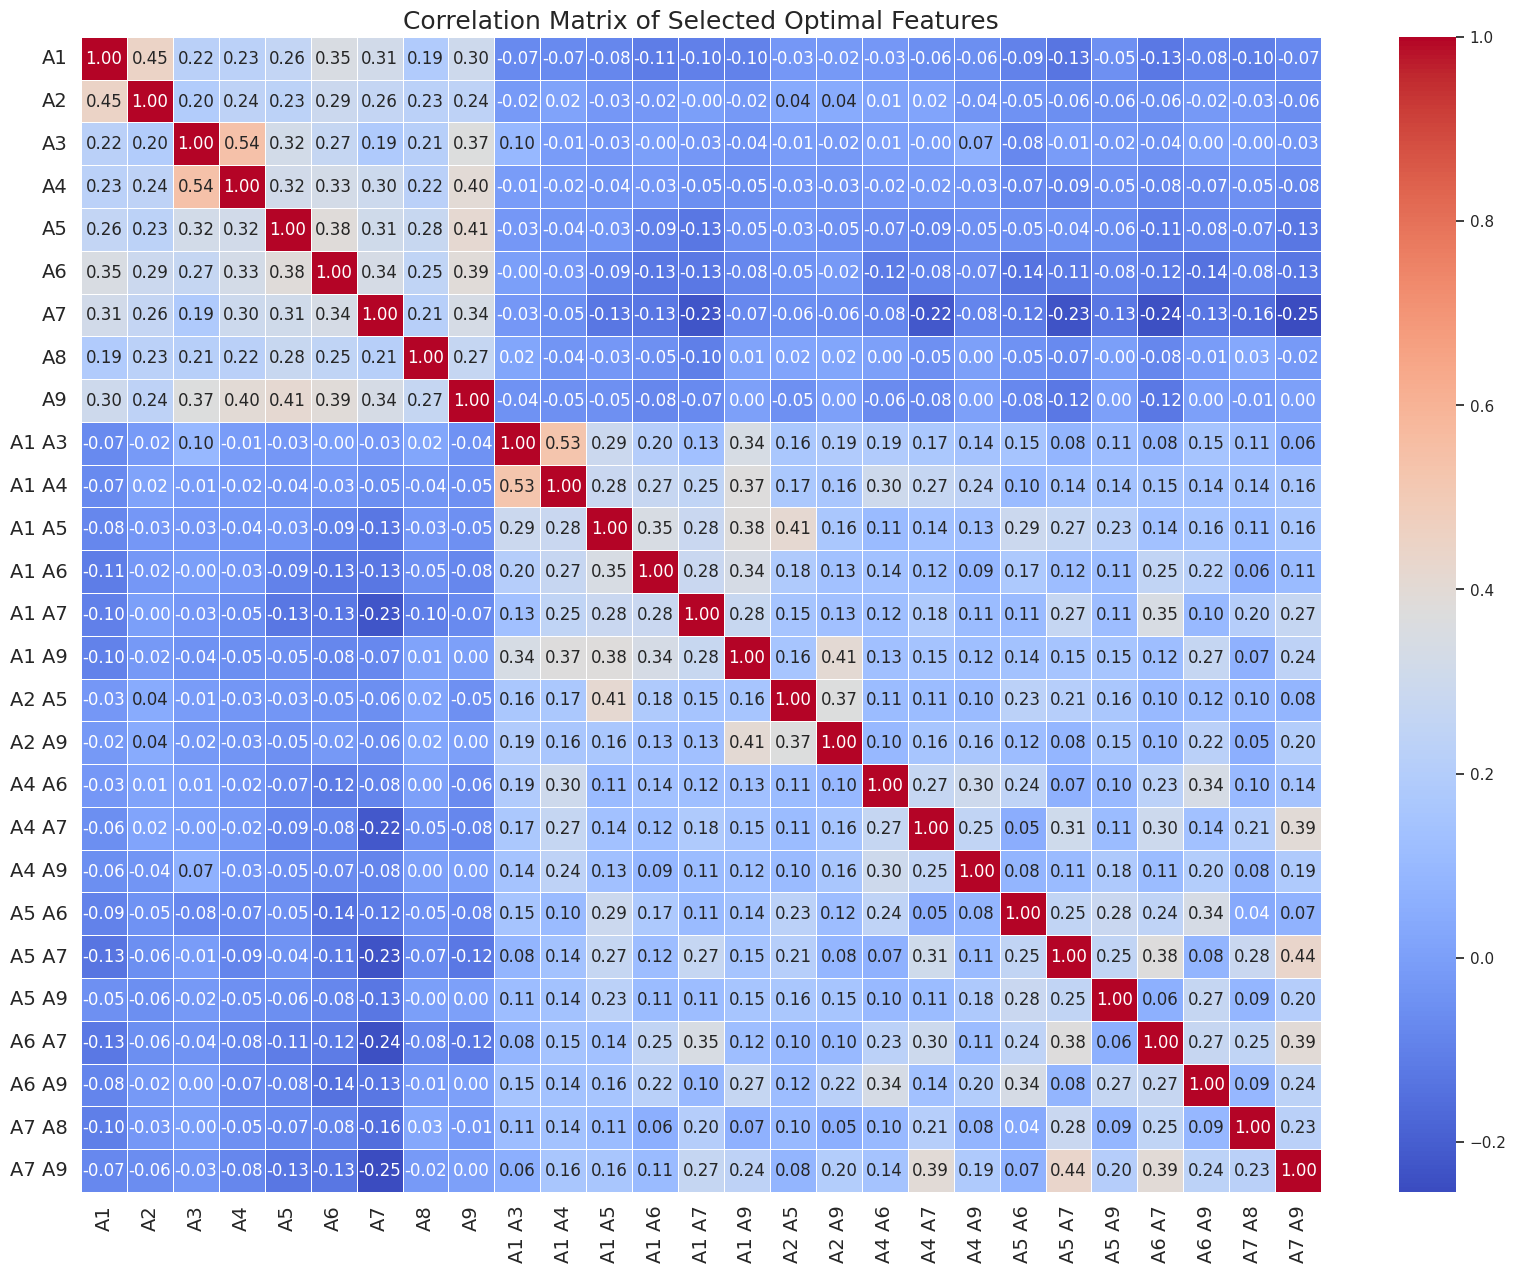

In [38]:
# Assuming the selected features are from the original dataset, we need to extract these from X_combined
selected_feature_indices = k_best.get_support(indices=True)

# Create a DataFrame for the selected features
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
selected_features_df = pd.DataFrame(X_combined[:, selected_feature_indices], columns=selected_feature_names)

# Draw the correlation matrix of the selected features
plt.figure(figsize=(20, 15))
selected_corr_matrix = selected_features_df.corr()
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidth=.7)
plt.title('Correlation Matrix of Selected Optimal Features', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/BalancedToddler/Features_figs/selected_features_correlation_matrix.png')
plt.show()

# Save DataFrame to Excel
selected_features_df.to_excel('/content/drive/MyDrive/ASD/BalancedToddler/selected_features.xlsx', index=False)


Features Score [631.37519665 477.13177147 363.65478068 595.31103393 768.66872275
 837.98768562 800.5114535  366.93408315 855.0459895   78.41092223
 112.55830574 137.90617616 105.90671339  98.51264231 116.21822994
 106.66434503  97.0502998   90.89991042 106.46150612  86.8989147
  99.17615106 137.39596064  89.44882929 172.19169326 119.30614173
  87.14174821 158.05171037]


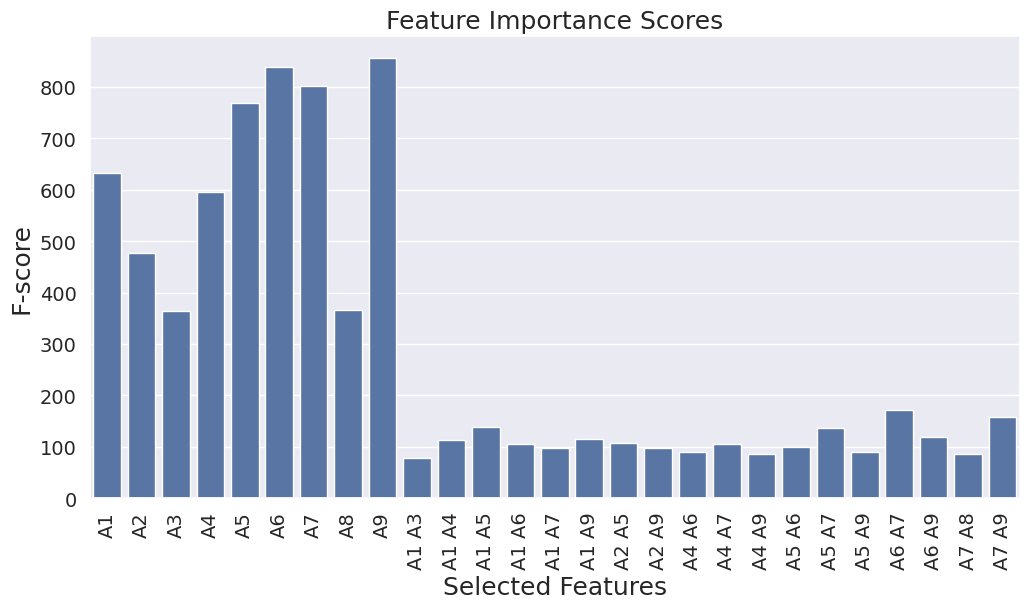

In [39]:
# Plot feature importances
feature_scores = k_best.scores_[k_best.get_support()]
print('Features Score', feature_scores)

#draw feature_importance
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_features, y=feature_scores)
plt.xlabel('Selected Features', fontsize=18)
plt.ylabel('F-score', fontsize=18)
plt.title('Feature Importance Scores', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/BalancedToddler/Features_figs/feature_importance_scores.png')
plt.show()



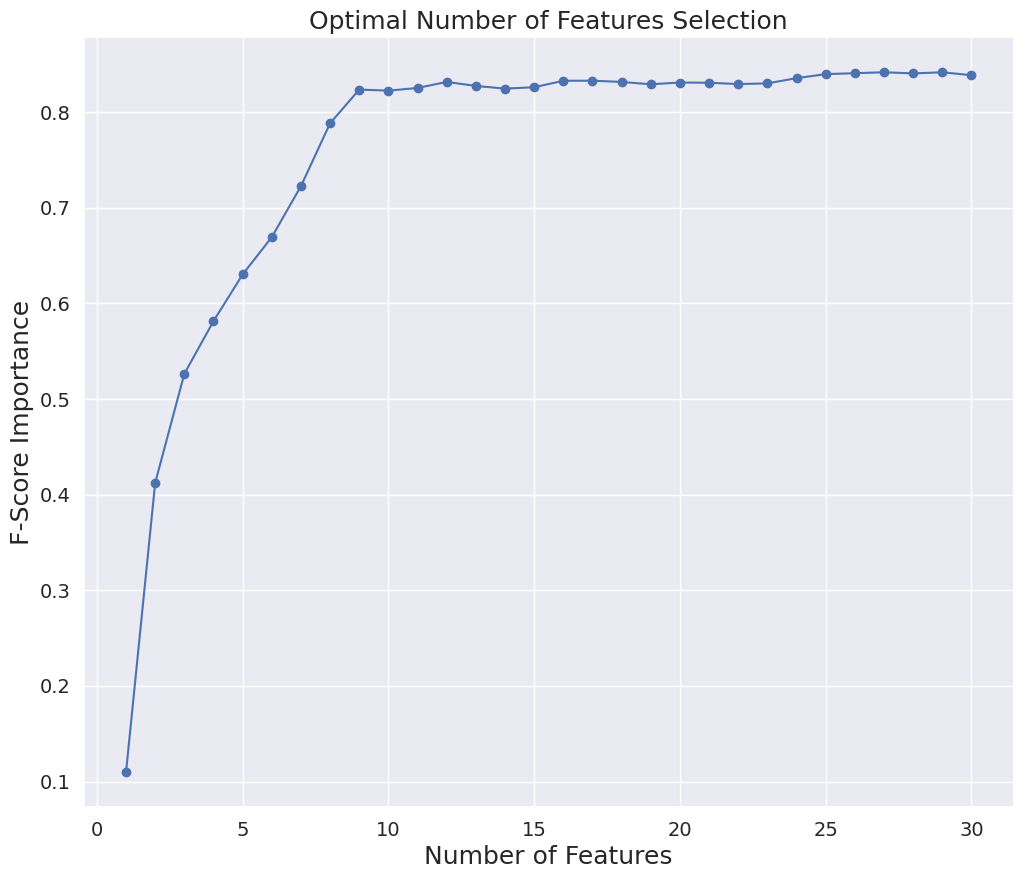

In [40]:
# Plot the scores for different values of k
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(scores)+1), scores, marker='o')
plt.xlabel('Number of Features', fontsize=18)
plt.ylabel('F-Score Importance', fontsize=18)
plt.title('Optimal Number of Features Selection', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/BalancedToddler/Features_figs/optimal_number_of_features.png')
plt.show()


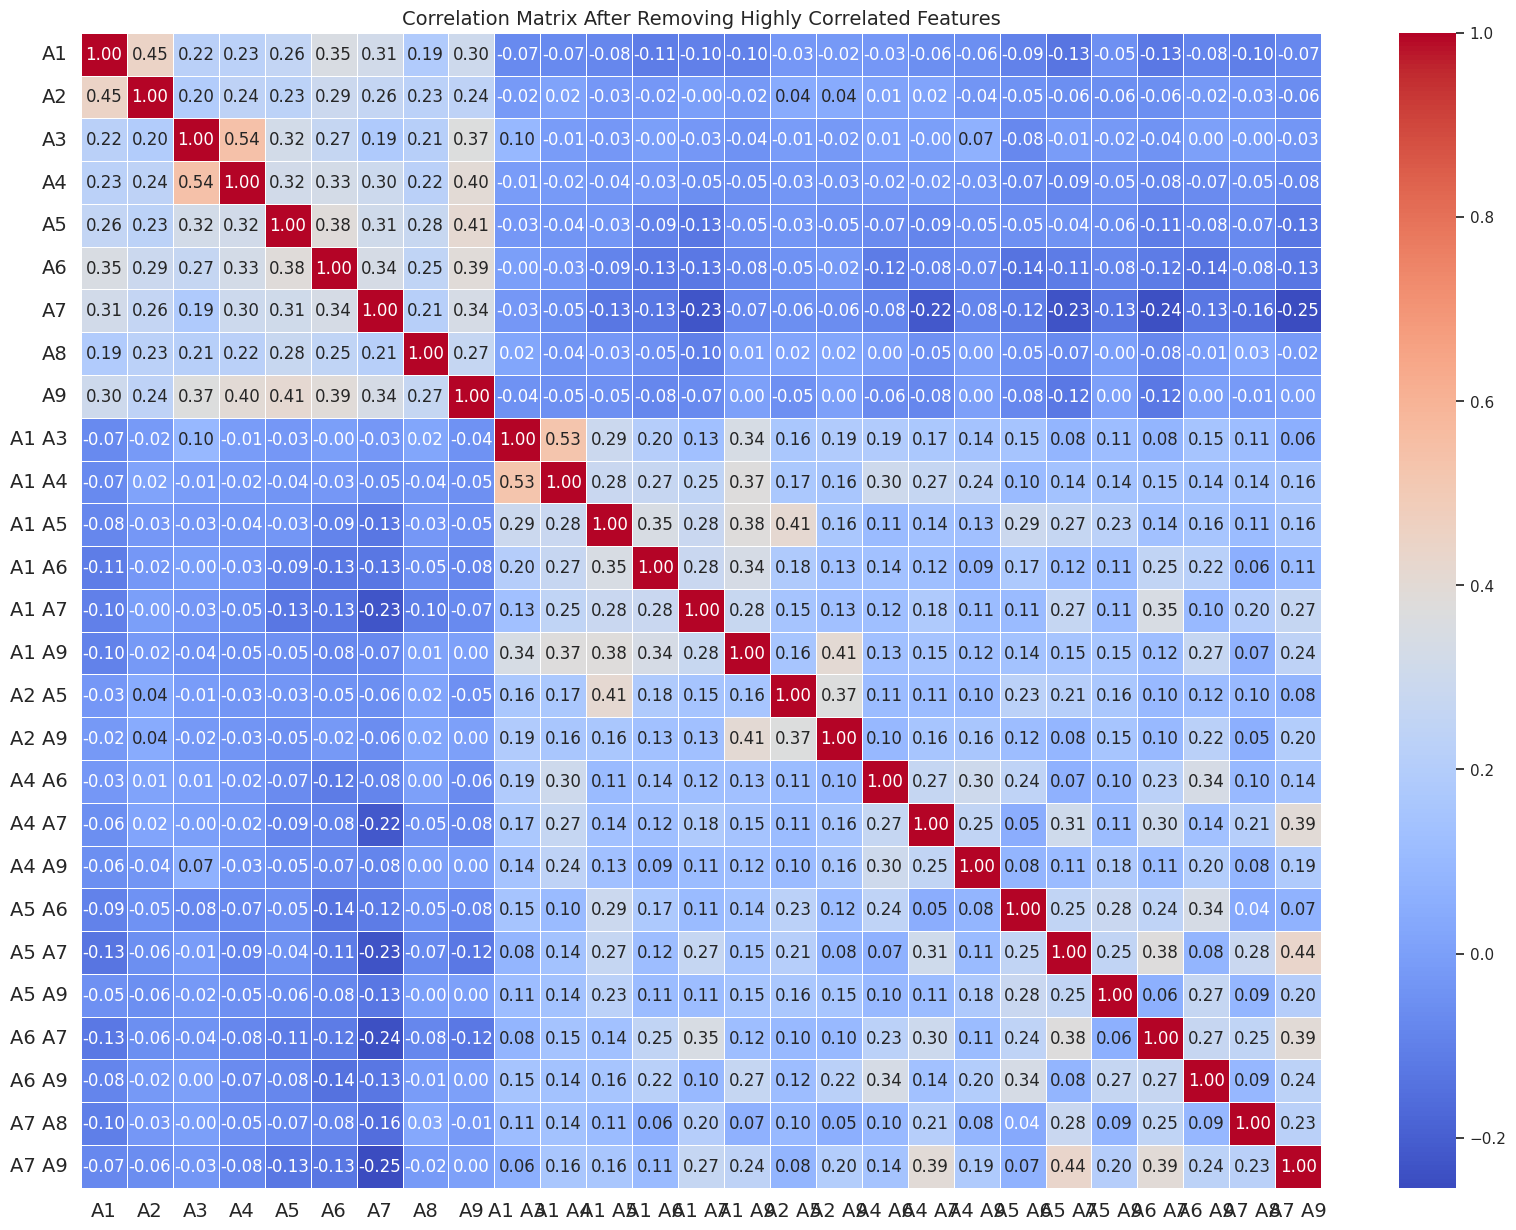

In [41]:
# Remove highly correlated features
def remove_highly_correlated_features(dataframe, threshold=0.85):
    corr_matrix = dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return dataframe.drop(columns=to_drop)

# Plot the correlation matrix for the reduced dataset
def plot_correlation_matrix(dataframe, title):
    plt.figure(figsize=(20, 15))
    corr_matrix = dataframe.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidth=.7)
    plt.title(title, fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('/content/drive/MyDrive/ASD/BalancedToddler/Features_figs/correlation_matrix_after_removing.png')
    plt.show()

# Convert selected features to DataFrame
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
X_reduced = remove_highly_correlated_features(X_selected_df)

# Convert reduced data to DataFrame and plot correlation matrix
X_reduced_df = pd.DataFrame(X_reduced, columns=X_reduced.columns)
plot_correlation_matrix(X_reduced_df, 'Correlation Matrix After Removing Highly Correlated Features')

#Split data

In [42]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from imblearn.combine import SMOTEENN
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y_combined, test_size=0.2, random_state=42)

# Convert to DataFrames
X_train = pd.DataFrame(X_train, columns=X_reduced.columns)
X_test = pd.DataFrame(X_test, columns=X_reduced.columns)
y_train = pd.DataFrame(y_train, columns=['ASD'])
y_test = pd.DataFrame(y_test, columns=['ASD'])

#Balance data distribution

In [43]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
# Display original class distribution
print("Original class distribution:", Counter(y_train))

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
# # # ---------------------
# #Balance data distribution
# from imblearn.combine import SMOTEENN

# # Initialize SMOTEENN
# smote_enn = SMOTEENN(random_state=42)

# # Fit and resample the data
# X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
# # # -----------------
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Identify columns with non-numeric data
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric using one-hot encoding
X_encoded = pd.get_dummies(X_train, columns=non_numeric_cols)

# Apply SMOTE to generate synthetic samples
# Use the encoded feature matrix X_encoded
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_train)
# --------------------------

# Display new class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Create a new DataFrame with the balanced dataset
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['ASD'] = y_resampled

# Save the balanced dataset to a new CSV file
balanced_data.to_csv('/content/drive/MyDrive/ASD/BalancedToddler/Balanced_Toddler_Dataset.csv', index=False)

Original class distribution: Counter({'ASD': 1})
Resampled class distribution: Counter({'ASD': 1})


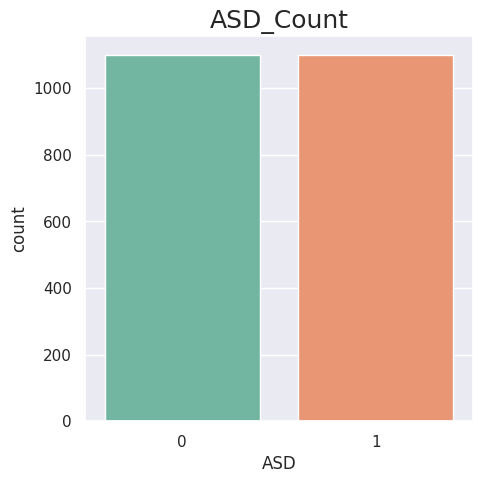

ASD
0    1101
1    1101
Name: count, dtype: int64

In [44]:
plt.figure(figsize=(5, 5))
sns.countplot(x='ASD', data=balanced_data,palette='Set2')
plt.title('ASD_Count', fontsize=18)
plt.savefig('/content/drive/MyDrive/ASD/BalancedToddler/Features_figs/ASD_countbalanced.png')
plt.show()
balanced_data['ASD'].value_counts()

In [45]:
X_resampled.shape

(2202, 27)

In [46]:
y_resampled.shape

(2202, 1)

In [47]:
#save 4 dataframs
X_train_data=X_resampled.to_csv('/content/drive/MyDrive/ASD/BalancedToddler/DataAfterPreprossing/X_train.csv', index=False)
X_test_data=X_test.to_csv('/content/drive/MyDrive/ASD/BalancedToddler/DataAfterPreprossing/X_test.csv', index=False)
y_train_data=y_resampled.to_csv('/content/drive/MyDrive/ASD/BalancedToddler/DataAfterPreprossing/y_train.csv', index=False)
y_test_data=y_test.to_csv('/content/drive/MyDrive/ASD/BalancedToddler/DataAfterPreprossing/y_test.csv', index=False)

In [48]:
#load 4 dataframes after preprossing
X_train = pd.read_csv('/content/drive/MyDrive/ASD/BalancedToddler/DataAfterPreprossing/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ASD/BalancedToddler/DataAfterPreprossing/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/ASD/BalancedToddler/DataAfterPreprossing/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ASD/BalancedToddler/DataAfterPreprossing/y_test.csv')

In [49]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (2202, 27)
X_test shape (390, 27)
y_train shape (2202, 1)
y_test shape (390, 1)


#Algorthims


In [50]:
classifiers = [
    'Random Forest',
    'Gradient Boosting',
    'Extra Trees',
    'Decision Tree',
    'K-Neighbors',
    'MLP'

]
RFc_Classifier=RandomForestClassifier(n_estimators=100)
GBc_Classifier=GradientBoostingClassifier(n_estimators=1000)
ETc_Classifier=ExtraTreesClassifier(n_estimators=100)
DTc_Classifier=DecisionTreeClassifier()
KNc_Classifier=KNeighborsClassifier()
MLP_Classifier=MLPClassifier()


accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
specificity_results = []
logloss_results = []
balanced_acc_results = []
mcc_results = []
kappa_results = []
f2_results = []
hamming_results = []
jaccard_results = []
brier_results = []

#Create model

In [51]:
def train_(Classifier):
    Classifier.fit(X_train, y_train)
    return Classifier

In [52]:
RFc_model=train_(RFc_Classifier)
GBc_model=train_(GBc_Classifier)
ETc_model=train_(ETc_Classifier)
DTc_model=train_(DTc_Classifier)
KNc_model=train_(KNc_Classifier)
MLP_model=train_(MLP_Classifier)



#SaveModel

In [53]:
import pickle

models = {
    'RFc_model': RFc_model,
    'GBc_model': GBc_model,
    'ETc_model': ETc_model,
    'DTc_model': DTc_model,
    'KNc_model': KNc_model,
    'MLP_model': MLP_model,

}

for model_name, model in models.items():
    model_filename = f'/content/drive/MyDrive/ASD/BalancedToddler/SavedModels/{model_name}.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f'{model_name} saved to {model_filename}')

RFc_model saved to /content/drive/MyDrive/ASD/BalancedToddler/SavedModels/RFc_model.pkl
GBc_model saved to /content/drive/MyDrive/ASD/BalancedToddler/SavedModels/GBc_model.pkl
ETc_model saved to /content/drive/MyDrive/ASD/BalancedToddler/SavedModels/ETc_model.pkl
DTc_model saved to /content/drive/MyDrive/ASD/BalancedToddler/SavedModels/DTc_model.pkl
KNc_model saved to /content/drive/MyDrive/ASD/BalancedToddler/SavedModels/KNc_model.pkl
MLP_model saved to /content/drive/MyDrive/ASD/BalancedToddler/SavedModels/MLP_model.pkl


#CrossValidation with cross_val_score

In [54]:
def cross_val(model):

  # Assuming you want to use 5-fold cross-validation and evaluate accuracy
  cv_scores = cross_val_score(model,X_train, y_train, cv=5, scoring='accuracy')

  print(f'=========={model}==============')

  # Print the cross-validation scores with k value
  for i, score in enumerate(cv_scores):
    print(f"At K = {i+1}:score ={score}")

  # Calculate the average cross-validation score
  average_cv_score = cv_scores.mean()
  print(f"Average cross-validation score:", average_cv_score)


In [55]:
cross_val(RFc_model)
cross_val(DTc_model)
cross_val(ETc_model)
cross_val(GBc_model)
cross_val(KNc_model)
cross_val(MLP_model)


==========RandomForestClassifier()==============
At K = 1:score =0.9501133786848073
At K = 2:score =0.9523809523809523
At K = 3:score =0.9704545454545455
At K = 4:score =0.9795454545454545
At K = 5:score =0.9863636363636363
Average cross-validation score: 0.9677715934858793
==========DecisionTreeClassifier()==============
At K = 1:score =0.9478458049886621
At K = 2:score =0.927437641723356
At K = 3:score =0.9590909090909091
At K = 4:score =0.9659090909090909
At K = 5:score =0.9590909090909091
Average cross-validation score: 0.9518748711605853
==========ExtraTreesClassifier()==============
At K = 1:score =0.9705215419501134
At K = 2:score =0.9614512471655329
At K = 3:score =0.9795454545454545
At K = 4:score =0.975
At K = 5:score =0.9818181818181818
Average cross-validation score: 0.9736672850958564
==========GradientBoostingClassifier(n_estimators=1000)==============
At K = 1:score =0.9750566893424036
At K = 2:score =0.9523809523809523
At K = 3:score =0.9818181818181818
At K = 4:score =

#CrossValidation with GridSearchCV

In [56]:

def grid_search(model, param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10,20],
        'min_samples_split': [2, 5, 10]
    }):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f'=========={model}==============')
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    return grid_search.best_estimator_

     # Evaluate the model with the best parameters
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test accuracy:", accuracy)
    return best_model



In [57]:
grid_search(RFc_model)
grid_search(ETc_model)
grid_search(GBc_model)


==========RandomForestClassifier()==============
Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.968677592249021
==========ExtraTreesClassifier()==============
Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9759400123685837
==========GradientBoostingClassifier(n_estimators=1000)==============
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.9750309214594928


GradientBoostingClassifier(max_depth=10, min_samples_split=10, n_estimators=300)

In [58]:
#Decision Tree classifier
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9564141414141414
Test accuracy: 0.9487179487179487


In [59]:
#KNeighborsClassifier
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNeighborsClassifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.9727623170480314
Test accuracy: 0.9743589743589743


In [60]:
#MLP classifier
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create an MLP classifier
mlp = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best score: 0.9791156462585034
Test accuracy: 0.9666666666666667
